In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(306)
plt.style.use('seaborn')

* 10 folds
* set aside 20% as test example 

In [3]:
Shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

### Step 1: Load the dataset

In [4]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

print("shape of feature matrix: ", features.shape)
print("shape of label matrix: ", labels.shape)

shape of feature matrix:  (20640, 8)
shape of label matrix:  (20640,)


In [5]:
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
labels.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [11]:
assert(features.shape[0] == labels.shape[0])

### Step 2: Data exploration

Done previously

### Step 3: Preprocessing and model building

#### Train test split

In [12]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

print("# training samples: ", train_features.shape[0])
print("# training samples: ", test_features.shape[0])

# training samples:  15480
# training samples:  5160


In [13]:
assert (train_features.shape[0] == train_labels.shape[0])
assert (test_features.shape[0] == test_labels.shape[0])

#### Pipeline: Preprocessing + Model

applying on training set 

In [14]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler( )),
                            ("lin_reg", LinearRegression())])

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [15]:
lin_reg_pipeline[-1], lin_reg_pipeline[-2]

(LinearRegression(), StandardScaler())

In [16]:
print("Intercept (w_0):", lin_reg_pipeline[-1].intercept_) # intercept through intercept_
print("Weight vector (w_1,....., w_m):", lin_reg_pipeline[-1].coef_) # rest of the weights through weight_

Intercept (w_0): 2.0703489205426377
Weight vector (w_1,....., w_m): [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


### Step 4: Model Evaluation

score gives R2 score

In [17]:
#Evaluate model performance in the test set.add
test_score = lin_reg_pipeline.score(test_features, test_labels)
print("Model performance on test set: ", test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print("Model performance on train set: ", train_score)

Model performance on test set:  0.5910509795491352
Model performance on train set:  0.609873031052925


as the train score is not that high so it points towards the underfitting in the model 

#### Cross validated score(cross_val_score)

Since the score was computed on one fold that was selected as a test set, it may not be all that robust. In order to obtain robust estimate of the performance, we use cross_val_score that calculates score on different test folds through cross validation 

In [18]:
lin_reg_score = cross_val_score(
        lin_reg_pipeline,
        train_features,
        train_labels,
        scoring = 'neg_mean_squared_error',
        cv = Shuffle_split_cv
)

#This will print 10 different scores, one for each score
print(lin_reg_score)

# We can take the mean and standard deviation of the score and report it.
print(f"\nScore of linear regression model on the test set: \n"
        f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear regression model on the test set: 
-0.529 +/- 0.022


all the scores are farely comparable and that is also justified by the std 

##### Other popular choices for error 
* explained_variance
* max_error
* neg_mean_absolute_error
* neg_root_mean_squared_error
* neg_mean_squared_log_error
* neg_median_absolute_error
* neg_mean_absolute_percentaage_error
* r2

In [21]:
lin_reg_score = -lin_reg_score # MSE
print(lin_reg_score)
print(f"\nScore of linear regression model on the test set: \n"
        f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

[0.50009976 0.52183352 0.55931218 0.52110499 0.56059203 0.50510767
 0.52386194 0.54775518 0.5007161  0.54713448]

Score of linear regression model on the test set: 
0.529 +/- 0.022


#### Cross Validation

In [22]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels,
                                    cv = Shuffle_split_cv,
                                    scoring="neg_mean_squared_error",
                                    return_train_score=True,
                                    return_estimator=True)

generally train set performance is better than the test set performance

In [23]:
lin_reg_cv_results

{'fit_time': array([0.01334882, 0.00950265, 0.00875187, 0.0115943 , 0.00924492,
        0.00950766, 0.00931168, 0.01139164, 0.00983143, 0.01125932]),
 'score_time': array([0.00392199, 0.00404429, 0.        , 0.        , 0.00174832,
        0.0077517 , 0.00462675, 0.00050855, 0.00400591, 0.        ]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

multiply these scores by -1 to convert them into errors

In [28]:
train_error = -lin_reg_cv_results['train_score']
test_error = -lin_reg_cv_results['test_score']

print(f"Mean squareed error of linear regression model on the train set:\n"
        f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

print(f"Mean squareed error of linear regression model on the test set:\n"
        f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squareed error of linear regression model on the train set:
0.519 +/- 0.006
Mean squareed error of linear regression model on the test set:
0.529 +/- 0.022


#### Effect of training set size on error

In [29]:
# Function for visualisation

def plot_learning_curve(train_sizes, train_scores, test_scores):

    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)

    plt.fill_between(
            train_sizes,
            train_scores_mean - train_scores_std,
            train_scores_mean + train_scores_std,
            alpha = 0.1,
            color = "r",)

    plt.fill_between(
            train_sizes,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha = 0.1,
            color = "g",)

    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation error")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")

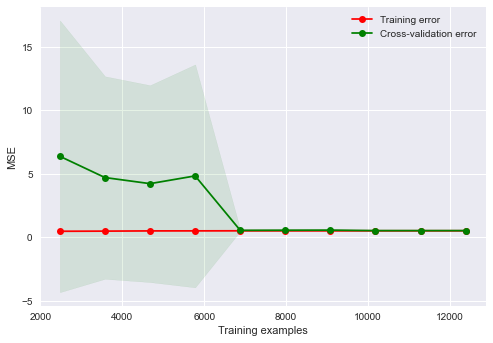

In [31]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    lin_reg_pipeline,
    train_features,
    train_labels,
    cv=Shuffle_split_cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_times=True,
    train_sizes=np.linspace(0.2, 1.0, 10) # use values between 0.2 - 1 and use 10 such values 
)

plot_learning_curve(train_sizes, train_scores, test_scores)

observations:

* Both curves have reached a plateau" They are close and fairly high.
* Few instances in the training set mean the model can fit them perfectly. But as more instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.
* When the model is trained on very few instances, it is not able to generalize properly, hence the validation error is high. <br> <br>
These learning curves are typical of underfitting model

If we plot the train size vs fit time plot then we can also see as the training size increases the fit time also increases

#### Model Examination

In [32]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

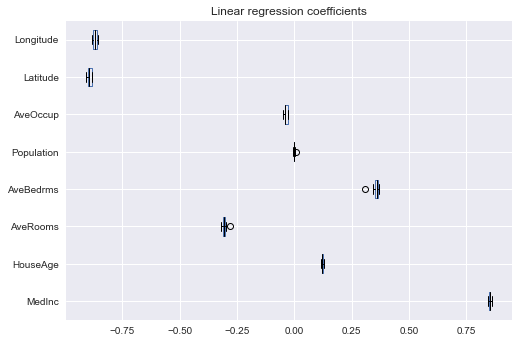

In [33]:
coefs = [est[-1].coef_ for est in lin_reg_cv_results["estimator"]]
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_df.plot.box(color=color, vert=False)
_ = plt.title("Linear regression coefficients")

Observations : 

* here we can see that the weights with houseAge, longitude, MedInc is compact, ie it has less sd.
* for population, AveRooms, AveBedrms there are some outliers

In [34]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


##### Selecting best model

In [37]:
# model with least error is the best model 
best_model_index = np.argmin(test_error)
print(best_model_index)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

0


In [38]:
print("Intercept (w_0):", selected_model['lin_reg'].intercept_) # intercept through intercept_
print("Weight vector (w_1,....., w_m):", selected_model['lin_reg'].coef_) # rest of the weights through weight_

Intercept (w_0): 2.0779898917958657
Weight vector (w_1,....., w_m): [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


#### Model performance

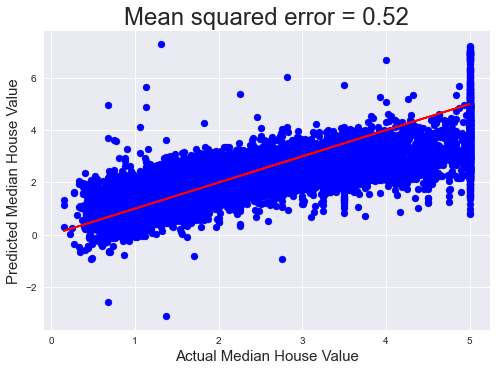

In [39]:
# scores for points when they were part of the test set 
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error = {mse_cv:.2f}", size=24)
plt.xlabel("Actual Median House Value", size=15)
plt.ylabel("Predicted Median House Value", size=15)
plt.show()

At this stage, we should perform error analysis and check where the predictions are going wrong. We can revisit feature construction, preprocessing and model stages and make the necessary course correction to get better performance. 

* As we can see there are some -ve predictions which is not true in real world. we can fix this by adding a constraint that weights should always be +ve

#### STEP 5: Predictions

In [40]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

if the test labels are also available then we can plot prev plot here too, but test labels are not always available in real world 

In [41]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

#### STEP 6: Report model performance

In [42]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)

print("R2 score for the best model obtained via cross validation: ", score_cv)
print("R2 score for the model without cross validation: ", score)

R2 score for the best model obtained via cross validation:  0.5923577635319088
R2 score for the model without cross validation:  0.5910509795491352


In [43]:
mse_cv = mean_squared_error(test_labels, test_predictions_cv)
mse = mean_squared_error(test_labels, test_predictions)

print("MSE for the best model obtained via cross validation: ", mse_cv)
print("MSE for the model without cross validation: ", mse)

MSE for the best model obtained via cross validation:  0.5393995876218523
MSE for the model without cross validation:  0.5411287478470688


Cross validated models have slightly better results